In [10]:
import numpy as np
import json
import scipy.sparse as sparse
import matplotlib.pyplot as plt

In [5]:
data_dir = '../../DATA/ssc.hg38/genotypes/phase1-3'

In [30]:
chrom, start_pos, end_pos = '5', 23443586, 23528597
#chrom, start_pos, end_pos = '5', 23526910, 23527650
#chrom, start_pos, end_pos = '5', 23507609, 23528597

with open('%s/info.json' % data_dir, 'r') as f:
    info = json.load(f)
    batch_size = info['batch_size']
    
batch_num = int(np.floor(end_pos/batch_size))
print(batch_num)

2


In [31]:
coords = np.load('%s/chr.%s.%d.gen.coordinates.npy' % (data_dir, chrom, batch_num))
data = sparse.load_npz('%s/chr.%s.%d.gen.npz' % (data_dir, chrom, batch_num))
indices = (coords[:, 1]>=start_pos) & (coords[:, 1]<=end_pos) & (coords[:, 2]==1) & (coords[:, 3]==1)
data = data[:, indices].A
snp_positions = coords[indices, 1]
print(data.shape, snp_positions.shape)

(400, 544) (544,)


542


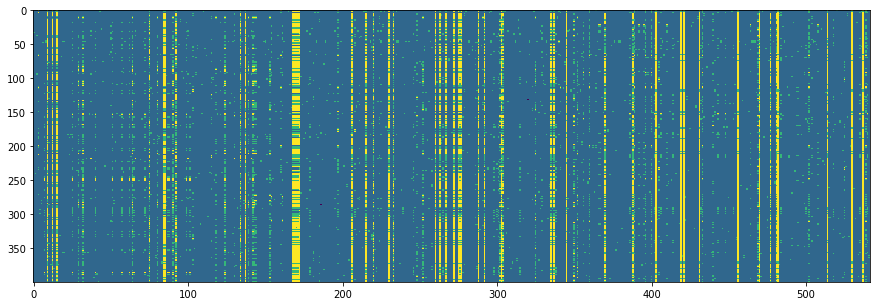

In [32]:
indices = np.any(data>0, axis=0) & np.any(data!=2, axis=0)
print(np.sum(indices))

plt.figure(figsize=(15, 5))
plt.imshow(data[:, indices], aspect='auto', vmin=-1, vmax=2)
plt.show()